In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings('ignore')

KIDNEY DISEASE PREDICTION

In [3]:
df1 = pd.read_csv("Kidney_disease.csv")
df1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


DATA CLEANING

Check Missing Values:

In [4]:
df1.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
# Replace '?' with NaN
df1.replace('?', np.nan, inplace=True)

# Convert numeric columns
for col in df1.columns:
    df1[col] = pd.to_numeric(df1[col], errors='ignore')

# Fill missing numeric values with mean
for col in df1.select_dtypes(include=['float64', 'int64']):
    df1[col].fillna(df1[col].mean(), inplace=True)

# Fill categorical missing values with mode
for col in df1.select_dtypes(include=['object']):
    df1[col].fillna(df1[col].mode()[0], inplace=True)

In [6]:
# encode categorical variable

le = LabelEncoder()
for col in df1.select_dtypes(include=['object']):
    df1[col] = le.fit_transform(df1[col])

df1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


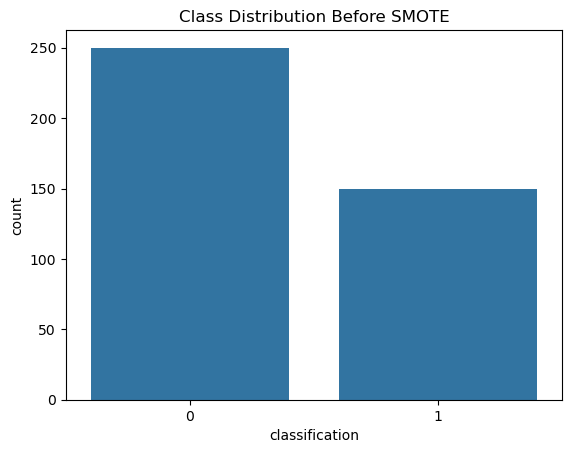

classification
0    250
1    150
Name: count, dtype: int64

In [7]:
# check class imbalance

sns.countplot(x='classification', data=df1)
plt.title("Class Distribution Before SMOTE")
plt.show()

df1['classification'].value_counts()

In [9]:
X = df1.drop('classification', axis=1)
y = df1['classification']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

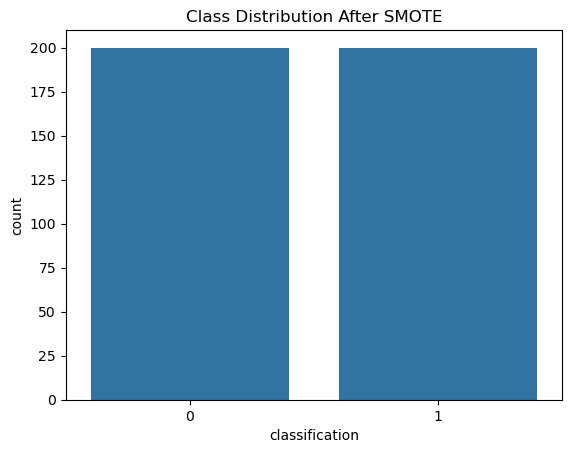

In [10]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualize after SMOTE
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.show()

In [11]:
scaler = StandardScaler()

X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION

In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
lr_pred = lr.predict(X_test)

In [13]:
print("Logistic Regression Accuracy :", accuracy_score(y_test, lr_pred))

print("Logistic Regression\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy : 1.0
Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



RANDOM FOREST CLASSIFIER

In [14]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_smote, y_train_smote)
rf_pred = rf.predict(X_test)

In [15]:
print("Random Forest Accuracy       :", accuracy_score(y_test, rf_pred))

print("Random Forest\n", classification_report(y_test, rf_pred))

Random Forest Accuracy       : 1.0
Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



SUPPORT VECTOR MACHINE

In [16]:
svm = SVC(kernel='rbf', probability=True, class_weight='balanced')
svm.fit(X_train_smote, y_train_smote)
svm_pred = svm.predict(X_test)

In [17]:
print("SVM Accuracy                 :", accuracy_score(y_test, svm_pred))

print("SVM\n", classification_report(y_test, svm_pred))

SVM Accuracy                 : 1.0
SVM
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



CONFUSION MATRIX VISUALIZATION

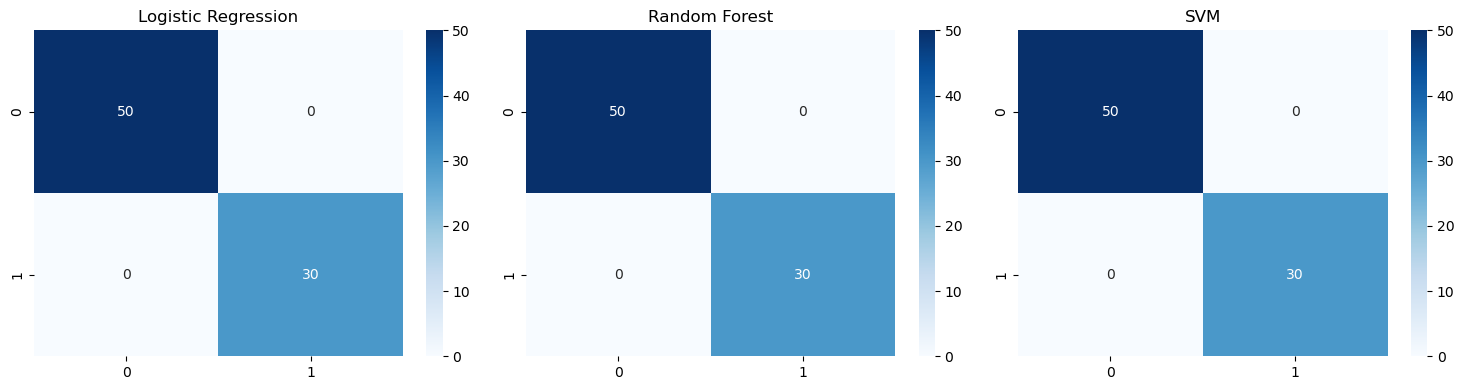

In [18]:
models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred
}

plt.figure(figsize=(15,4))

for i, (name, pred) in enumerate(models.items()):
    plt.subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(y_test, pred),
                annot=True, fmt='d', cmap='Blues')
    plt.title(name)

plt.tight_layout()
plt.show()

ROC CURVE VISUALIZATION

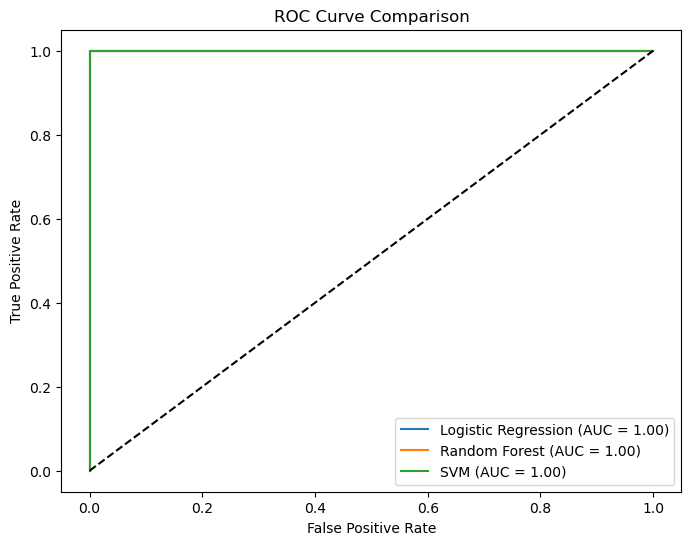

In [19]:
plt.figure(figsize=(8,6))

for model, name in zip(
    [lr, rf, svm],
    ["Logistic Regression", "Random Forest", "SVM"]
):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

ACCURACY COMPARISON BAR CHART

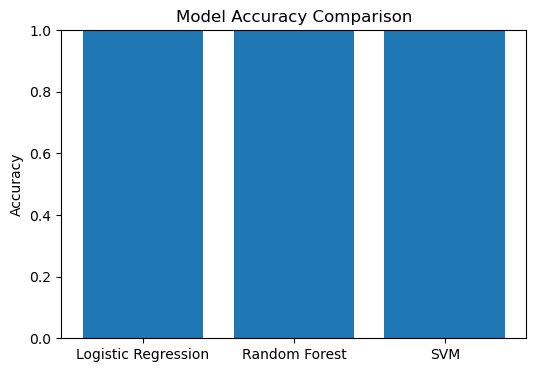

In [20]:
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SVM": accuracy_score(y_test, svm_pred)
}

plt.figure(figsize=(6,4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

In [21]:
pickle.dump(lr, open("kidney_lr_model.pkl", "wb"))
pickle.dump(rf, open("kidney_rf_model.pkl", "wb"))
pickle.dump(svm, open("kidney_svm_model.pkl", "wb"))
pickle.dump(scaler, open("kidney_scaler.pkl", "wb"))

LIVER DISEASE PREDICTION

In [23]:
df2 = pd.read_csv("Liver_disease.csv")
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


DATA CLEANING

Check missing values:

In [24]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [25]:
df2.replace("?", np.nan, inplace=True)
df2.dropna(inplace=True)

In [26]:
# object column encoding:

df2.select_dtypes(include= "object")
le = LabelEncoder()

for i in df2.select_dtypes(include= "object").columns:
    df2[i] = le.fit_transform(df2[i])

df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


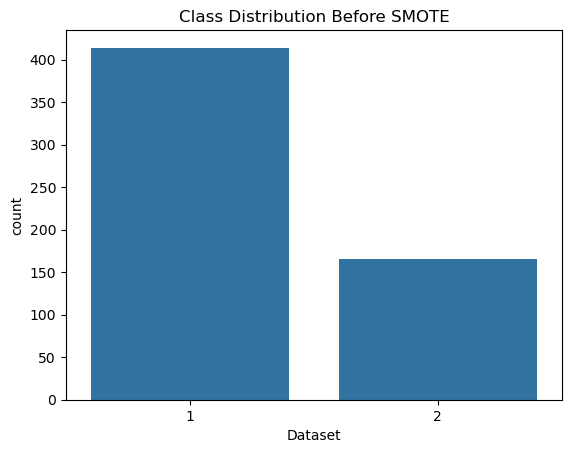

Dataset
1    414
2    165
Name: count, dtype: int64

In [28]:
# check class imbalance

sns.countplot(x='Dataset', data=df2)
plt.title("Class Distribution Before SMOTE")
plt.show()

df2['Dataset'].value_counts()

In [29]:
X = df2.drop('Dataset', axis=1)
y = df2['Dataset']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

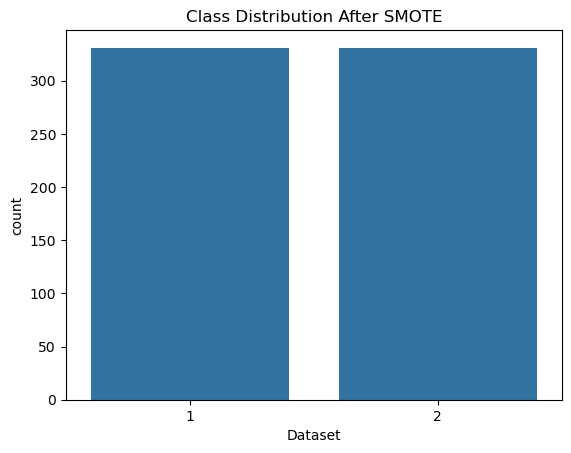

In [30]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualize after SMOTE
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.show()

In [31]:
scaler = StandardScaler()

X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION

In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
lr_pred = lr.predict(X_test)

In [33]:
print("Logistic Regression Accuracy :", accuracy_score(y_test, lr_pred))

print("Logistic Regression\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy : 0.5948275862068966
Logistic Regression
               precision    recall  f1-score   support

           1       0.86      0.52      0.65        83
           2       0.39      0.79      0.53        33

    accuracy                           0.59       116
   macro avg       0.63      0.65      0.59       116
weighted avg       0.73      0.59      0.61       116



RANDOM FOREST CLASSIFIER

In [34]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_smote, y_train_smote)
rf_pred = rf.predict(X_test)

In [35]:
print("Random Forest Accuracy       :", accuracy_score(y_test, rf_pred))

print("Random Forest\n", classification_report(y_test, rf_pred))

Random Forest Accuracy       : 0.6379310344827587
Random Forest
               precision    recall  f1-score   support

           1       0.86      0.59      0.70        83
           2       0.42      0.76      0.54        33

    accuracy                           0.64       116
   macro avg       0.64      0.67      0.62       116
weighted avg       0.74      0.64      0.66       116



SUPPORT VECTOR MACHINE

In [36]:
svm = SVC(kernel='rbf', probability=True, class_weight='balanced')
svm.fit(X_train_smote, y_train_smote)
svm_pred = svm.predict(X_test)

In [37]:
print("SVM Accuracy                 :", accuracy_score(y_test, svm_pred))

print("SVM\n", classification_report(y_test, svm_pred))

SVM Accuracy                 : 0.5862068965517241
SVM
               precision    recall  f1-score   support

           1       0.86      0.51      0.64        83
           2       0.39      0.79      0.52        33

    accuracy                           0.59       116
   macro avg       0.62      0.65      0.58       116
weighted avg       0.72      0.59      0.60       116



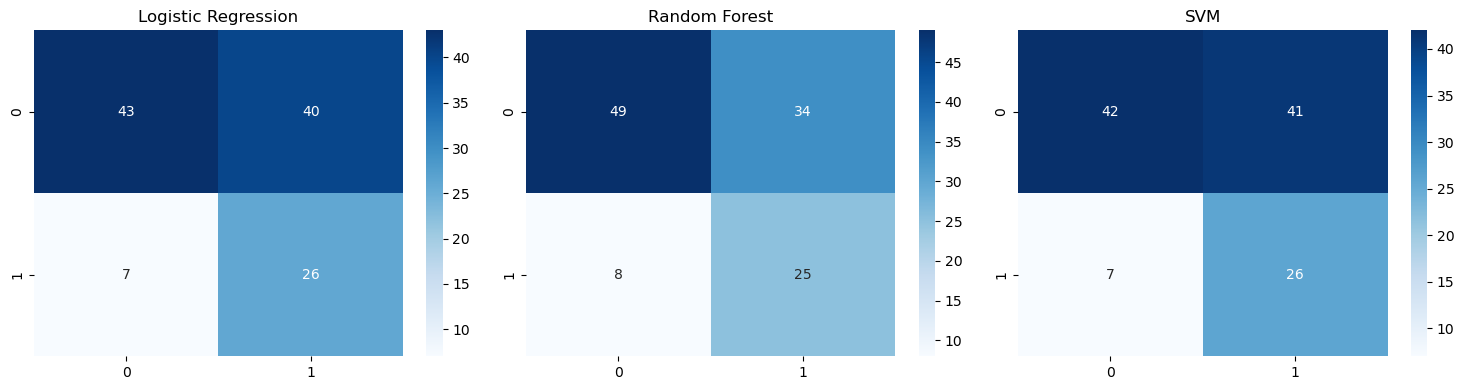

In [38]:
# confusion matrix visualization

models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred
}

plt.figure(figsize=(15,4))

for i, (name, pred) in enumerate(models.items()):
    plt.subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(y_test, pred),
                annot=True, fmt='d', cmap='Blues')
    plt.title(name)

plt.tight_layout()
plt.show()

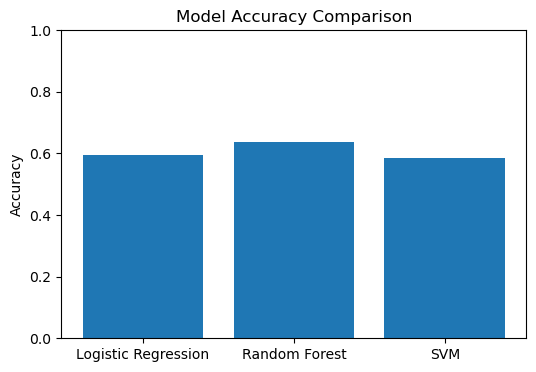

In [40]:
# accuracy comparison bar chart

accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SVM": accuracy_score(y_test, svm_pred)
}

plt.figure(figsize=(6,4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

In [41]:
pickle.dump(lr, open("liver_lr_smote.pkl", "wb"))
pickle.dump(rf, open("liver_rf_smote.pkl", "wb"))
pickle.dump(svm, open("liver_svm_smote.pkl", "wb"))
pickle.dump(scaler, open("liver_scaler.pkl", "wb"))

PARKINSON PREDICTION

In [42]:
df3 = pd.read_csv("Parkinsons.csv")
df3.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


DATA CLEANING

In [43]:
# Drop name column
df3.drop('name', axis=1, inplace=True)

# Check missing values
df3.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

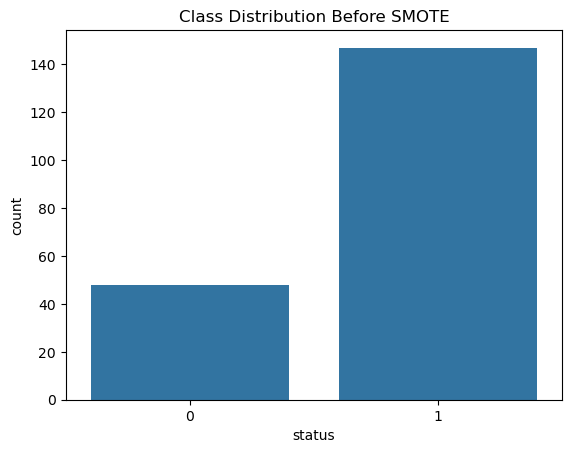

status
1    147
0     48
Name: count, dtype: int64

In [44]:
# check class imbalance

sns.countplot(x='status', data=df3)
plt.title("Class Distribution Before SMOTE")
plt.show()

df3['status'].value_counts()

In [45]:
X = df3.drop('status', axis=1)
y = df3['status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

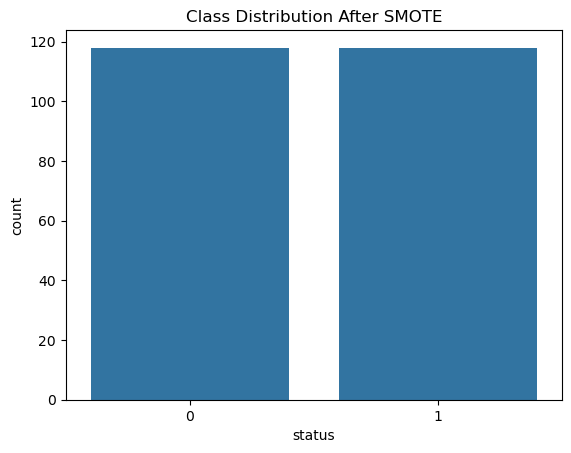

In [46]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualize after SMOTE
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.show()

In [47]:
scaler = StandardScaler()

X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION

In [48]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
lr_pred = lr.predict(X_test)

In [49]:
print("Logistic Regression Accuracy :", accuracy_score(y_test, lr_pred))

print("Logistic Regression\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy : 0.7948717948717948
Logistic Regression
               precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.96      0.76      0.85        29

    accuracy                           0.79        39
   macro avg       0.76      0.83      0.77        39
weighted avg       0.86      0.79      0.81        39



RANDOM FOREST CLASSIFIER

In [50]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_smote, y_train_smote)
rf_pred = rf.predict(X_test)

In [51]:
print("Random Forest Accuracy       :", accuracy_score(y_test, rf_pred))

print("Random Forest\n", classification_report(y_test, rf_pred))

Random Forest Accuracy       : 0.9230769230769231
Random Forest
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



SUPPORT VECTOR MACHINE

In [52]:
svm = SVC(kernel='rbf', probability=True, class_weight='balanced')
svm.fit(X_train_smote, y_train_smote)
svm_pred = svm.predict(X_test)

In [53]:
print("SVM Accuracy                 :", accuracy_score(y_test, svm_pred))

print("SVM\n", classification_report(y_test, svm_pred))

SVM Accuracy                 : 0.8205128205128205
SVM
               precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.96      0.79      0.87        29

    accuracy                           0.82        39
   macro avg       0.78      0.85      0.79        39
weighted avg       0.87      0.82      0.83        39



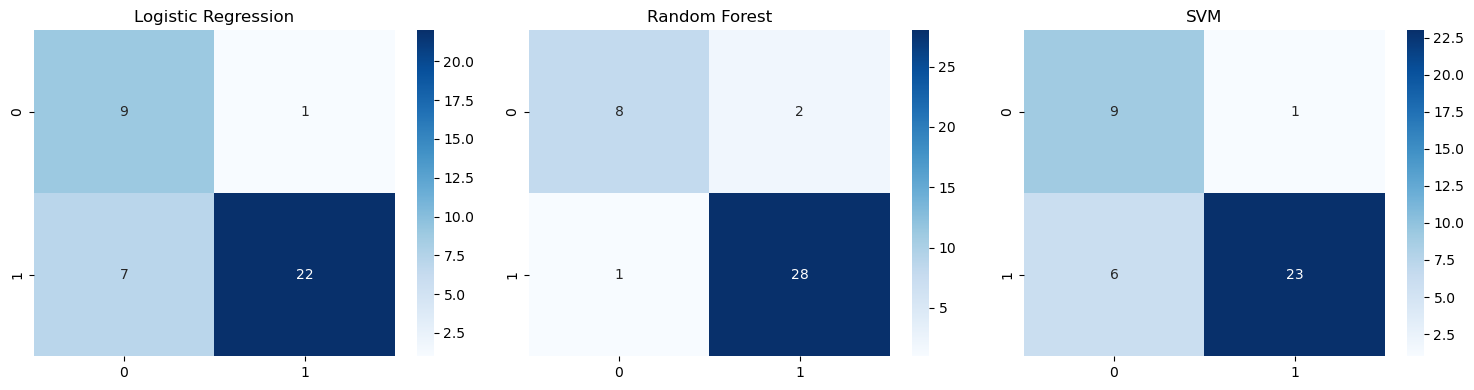

In [54]:
# confusion matrix visualization

models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred
}

plt.figure(figsize=(15,4))

for i, (name, pred) in enumerate(models.items()):
    plt.subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(y_test, pred),
                annot=True, fmt='d', cmap='Blues')
    plt.title(name)

plt.tight_layout()
plt.show()

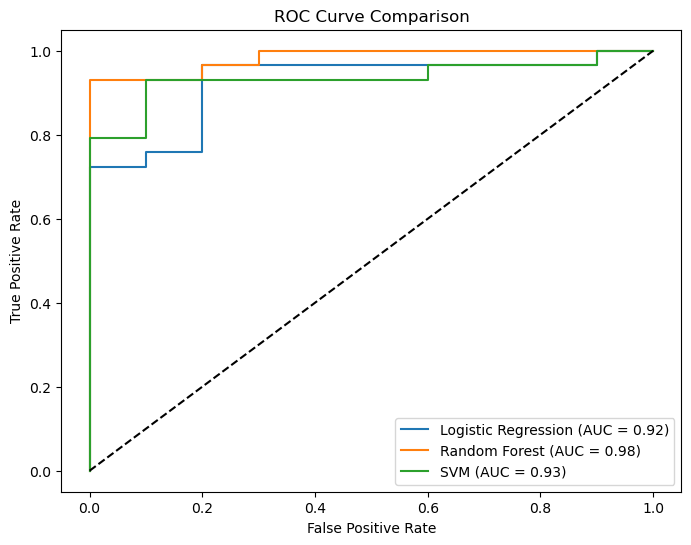

In [55]:
# roc curve visualization

plt.figure(figsize=(8,6))

for model, name in zip(
    [lr, rf, svm],
    ["Logistic Regression", "Random Forest", "SVM"]
):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

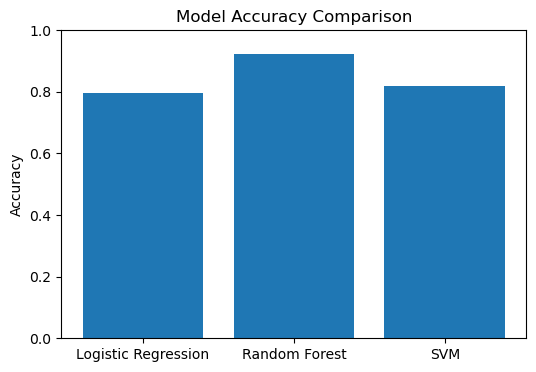

In [56]:
# accuracy comparison bar chart

accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SVM": accuracy_score(y_test, svm_pred)
}

plt.figure(figsize=(6,4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

In [57]:
pickle.dump(lr, open("parkinsons_lr_smote.pkl", "wb"))
pickle.dump(rf, open("parkinsons_rf_smote.pkl", "wb"))
pickle.dump(svm, open("parkinsons_svm_smote.pkl", "wb"))
pickle.dump(scaler, open("parkinsons_scaler.pkl", "wb"))